In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer CSV

In [113]:
mallorca= pd.read_csv("Mallorca.csv")
mallorca.head(5)

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_location,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,69998.0,20241214212418,2024-12-15,city scrape,COZY HIDEAWAY LOFT... MI AMOR...,353156,Lor,2011-01-19,"Palma, Spain",within an hour,...,2024-10-26,4.95,4.92,4.93,4.95,4.97,4.89,4.81,t,2
1,106833.0,20241214212418,2024-12-15,city scrape,Villa with a big pool in Mallorca,551974,Xisco,2011-05-02,"Palma de Mallorca, Spain",NaN,...,2024-09-11,4.89,4.81,4.81,4.89,4.92,4.52,4.63,f,1
2,159218.0,20241214212418,2024-12-15,city scrape,Farmhouse in Nature -ET-3025,763897,Gabriel,2011-06-30,"Inca, Spain",within an hour,...,2024-10-27,4.92,4.88,4.93,4.96,4.95,4.82,4.75,f,1
3,164185.0,20241214212418,2024-12-15,city scrape,Corazón de Palma-Habitación con baño privado.,788123,Maria,2011-07-07,"Costa d'en Blanes, Spain",within an hour,...,2024-10-26,4.75,4.72,4.64,4.93,4.90,4.93,4.68,f,1
4,166820.0,20241214212418,2024-12-15,city scrape,Guest House with Great sea views - Principal Room,794829,Toni,2011-07-08,"Balearic Islands, Spain",within an hour,...,2024-10-08,4.67,4.75,4.35,4.87,4.91,4.94,4.60,t,4


In [ ]:
mallorca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16867 entries, 0 to 16866
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16867 non-null  float64
 1   scrape_id                       16867 non-null  int64  
 2   last_scraped                    16867 non-null  object 
 3   source                          16867 non-null  object 
 4   name                            16867 non-null  object 
 5   host_id                         16867 non-null  int64  
 6   host_name                       16867 non-null  object 
 7   host_since                      16867 non-null  object 
 8   host_location                   12340 non-null  object 
 9   host_response_time              15434 non-null  object 
 10  host_response_rate              15434 non-null  object 
 11  host_acceptance_rate            16205 non-null  object 
 12  host_location.1                 

# Reemplazar Valores Nulos

In [114]:
mallorca_cuanti=mallorca.select_dtypes(include=["float64","int64","float","int"])
mallorca_cuali=mallorca.select_dtypes(include=["object","datetime","category"])

cuantias_mean=mallorca_cuanti.fillna(round(mallorca_cuanti.mean(),1))
cualis_bfill=mallorca_cuali.fillna(method="bfill")
cualis_ffill=mallorca_cuali.fillna(method="ffill")

mallorca_casi_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)
mallorca_sin_nulos = mallorca_casi_sin_nulos.drop(columns=['neighbourhood_group_cleansed'])
mallorca_sin_nulos

/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98079/4100738421.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=mallorca_cuali.fillna(method="bfill")
/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98079/4100738421.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=mallorca_cuali.fillna(method="ffill")


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,neighbourhood,neighbourhood_cleansed,property_type,room_type,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,6.999800e+04,20241214212418,353156,2,5,39.569870,2.654640,2,1.0,1.0,...,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,Entire loft,NaN,$76.00,t,2024-12-15,2012-01-24,2024-10-26,t
1,1.068330e+05,20241214212418,551974,1,1,39.614580,3.301000,4,1.0,2.0,...,"Palma de Mallorca, Balearic Islands, Spain",Sant Llorenç des Cardassar,Entire villa,Entire home/apt,$200.00,t,2024-12-15,2012-06-05,2024-09-11,f
2,1.592180e+05,20241214212418,763897,1,1,39.738390,2.897450,3,1.0,1.0,...,"Selva, Balearic Islands, Spain",Selva,Entire cottage,Entire home/apt,$90.00,t,2024-12-15,2011-09-15,2024-10-27,f
3,1.641850e+05,20241214212418,788123,2,3,39.572710,2.644480,2,1.0,1.0,...,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,Private room in guest suite,Private room,$50.00,t,2024-12-15,2011-08-16,2024-10-26,f
4,1.668200e+05,20241214212418,794829,4,5,39.678940,2.500520,2,1.0,1.0,...,"Palma de Mallorca, Balearic Islands, Spain",Banyalbufar,Private room in home,Private room,$70.00,t,2024-12-15,2011-08-08,2024-10-08,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,1.308224e+18,20241214212418,588497055,1,1,39.573649,2.648082,1,0.5,1.0,...,"Palma, Illes Balears, Spain",Palma de Mallorca,Private room in condo,Private room,$49.00,t,2024-12-15,2024-12-06,2024-12-06,f
16863,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,"Palma, Illes Balears, Spain",Puigpunyent,Private room in villa,Private room,$142.00,t,2024-12-15,2024-12-06,2024-12-06,t
16864,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,"Palma, Illes Balears, Spain",Puigpunyent,Private room in villa,Private room,$142.00,t,2024-12-15,2024-12-06,2024-12-06,t
16865,1.308462e+18,20241214212418,587006009,1002,1152,39.607365,2.556080,2,1.0,1.0,...,"Palma, Illes Balears, Spain",Puigpunyent,Private room in villa,Private room,$142.00,t,2024-12-15,2024-12-06,2024-12-06,t


# Eliminar Outliers

In [25]:
cuantitativas=mallorca.select_dtypes(include=["float64","int64","float","int"])
cualitativas=mallorca.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,last_scraped,source,name,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_location.1,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,2024-12-15,city scrape,COZY HIDEAWAY LOFT... MI AMOR...,Lor,2011-01-19,"Palma, Spain",within an hour,100%,91%,t,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2024-12-15,city scrape,Villa with a big pool in Mallorca,Xisco,2011-05-02,"Palma de Mallorca, Spain",NaN,NaN,88%,f,...,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2024-12-15,city scrape,Farmhouse in Nature -ET-3025,Gabriel,2011-06-30,"Inca, Spain",within an hour,100%,100%,t,...,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2024-12-15,city scrape,Corazón de Palma-Habitación con baño privado.,Maria,2011-07-07,"Costa d'en Blanes, Spain",within an hour,100%,99%,NaN,...,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2024-12-15,city scrape,Guest House with Great sea views - Principal Room,Toni,2011-07-08,"Balearic Islands, Spain",within an hour,100%,100%,f,...,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,2024-12-15,city scrape,Very Cosy and very central,Martina,2024-07-09,"Palma, Spain",within an hour,100%,100%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
16863,2024-12-15,city scrape,Habitación 5,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
16864,2024-12-15,city scrape,Habitación 4,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
16865,2024-12-15,city scrape,Habitación 3,Holidu,2024-07-02,"Palma, Spain",within an hour,100%,99%,f,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83


# Preparación de las Variables

In [115]:
frecuencia_rt = mallorca["room_type"].value_counts().reset_index()
frecuencia_rt.columns = ["room_type", "Frecuencia"]
frecuencia_rt

,room_type,Frecuencia
0,Entire home/apt,15476
1,Private room,1308
2,Hotel room,70
3,Shared room,12


In [116]:
mallorca["room_type"]=mallorca["room_type"].str.replace("Entire home/apt","1")
mallorca["room_type"]=mallorca["room_type"].str.replace("Private room","2")
mallorca["room_type"]=mallorca["room_type"].str.replace("Hotel room","3")
mallorca["room_type"]=mallorca["room_type"].str.replace("Shared room","4")
mallorca

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_location,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count
0,6.999800e+04,20241214212418,2024-12-15,city scrape,COZY HIDEAWAY LOFT... MI AMOR...,353156,Lor,2011-01-19,"Palma, Spain",within an hour,...,2024-10-26,4.95,4.92,4.93,4.95,4.97,4.89,4.81,t,2
1,1.068330e+05,20241214212418,2024-12-15,city scrape,Villa with a big pool in Mallorca,551974,Xisco,2011-05-02,"Palma de Mallorca, Spain",NaN,...,2024-09-11,4.89,4.81,4.81,4.89,4.92,4.52,4.63,f,1
2,1.592180e+05,20241214212418,2024-12-15,city scrape,Farmhouse in Nature -ET-3025,763897,Gabriel,2011-06-30,"Inca, Spain",within an hour,...,2024-10-27,4.92,4.88,4.93,4.96,4.95,4.82,4.75,f,1
3,1.641850e+05,20241214212418,2024-12-15,city scrape,Corazón de Palma-Habitación con baño privado.,788123,Maria,2011-07-07,"Costa d'en Blanes, Spain",within an hour,...,2024-10-26,4.75,4.72,4.64,4.93,4.90,4.93,4.68,f,1
4,1.668200e+05,20241214212418,2024-12-15,city scrape,Guest House with Great sea views - Principal Room,794829,Toni,2011-07-08,"Balearic Islands, Spain",within an hour,...,2024-10-08,4.67,4.75,4.35,4.87,4.91,4.94,4.60,t,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,1.308224e+18,20241214212418,2024-12-15,city scrape,Very Cosy and very central,588497055,Martina,2024-07-09,"Palma, Spain",within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1
16863,1.308462e+18,20241214212418,2024-12-15,city scrape,Habitación 5,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83
16864,1.308462e+18,20241214212418,2024-12-15,city scrape,Habitación 4,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83
16865,1.308462e+18,20241214212418,2024-12-15,city scrape,Habitación 3,587006009,Holidu,2024-07-02,"Palma, Spain",within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,83


In [117]:
mallorca['host_acceptance_rate'] = mallorca['host_acceptance_rate'].str.rstrip('%').astype(float)
mallorca['host_response_rate'] = mallorca['host_response_rate'].str.rstrip('%').astype(float)
mallorca['price'] = mallorca['price'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98079/4079770427.py:3: SyntaxWarning: invalid escape sequence '\$'
  mallorca['price'] = mallorca['price'].replace('[\$,]', '', regex=True).astype(float)


In [118]:
correlacion_prueba = mallorca[["host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness","price","availability_365","number_of_reviews","review_scores_communication","room_type"]]
correlacion_prueba

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,review_scores_communication,room_type
0,91.0,100.0,4.89,4.93,76.0,304,265,4.97,NaN
1,88.0,NaN,4.52,4.81,200.0,44,27,4.92,1
2,100.0,100.0,4.82,4.93,90.0,251,384,4.95,1
3,99.0,100.0,4.93,4.64,50.0,325,151,4.90,2
4,100.0,100.0,4.94,4.35,70.0,75,319,4.91,2
...,...,...,...,...,...,...,...,...,...
16862,100.0,100.0,NaN,NaN,49.0,357,0,NaN,2
16863,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2
16864,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2
16865,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2


In [119]:
correlacion_prueba = correlacion_prueba.apply(pd.to_numeric, errors="coerce")
correlacion_prueba

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,review_scores_communication,room_type
0,91.0,100.0,4.89,4.93,76.0,304,265,4.97,NaN
1,88.0,NaN,4.52,4.81,200.0,44,27,4.92,1.0
2,100.0,100.0,4.82,4.93,90.0,251,384,4.95,1.0
3,99.0,100.0,4.93,4.64,50.0,325,151,4.90,2.0
4,100.0,100.0,4.94,4.35,70.0,75,319,4.91,2.0
...,...,...,...,...,...,...,...,...,...
16862,100.0,100.0,NaN,NaN,49.0,357,0,NaN,2.0
16863,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2.0
16864,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2.0
16865,99.0,100.0,NaN,NaN,142.0,364,0,NaN,2.0


In [129]:
prueba_cuanti=correlacion_prueba.select_dtypes(include=["float64","int64","float","int"])
prueba_cuali=correlacion_prueba.select_dtypes(include=["object","datetime","category"])

cuantias_mean=prueba_cuanti.fillna(round(mallorca_cuanti.mean(),1))
cualis_bfill=prueba_cuali.fillna(method="bfill")
cualis_ffill=prueba_cuali.fillna(method="ffill")

correlacion_prueba = pd.concat([cuantias_mean,cualis_ffill],axis=1)
correlacion_prueba

/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98079/3600063614.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=prueba_cuali.fillna(method="bfill")
/var/folders/yg/xy4x70qj5dsfw9snfhl6938r0000gp/T/ipykernel_98079/3600063614.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=prueba_cuali.fillna(method="ffill")


,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,review_scores_communication,room_type
0,91.0,100.0,4.89,4.93,76.0,304,265,4.97,NaN
1,88.0,NaN,4.52,4.81,200.0,44,27,4.92,1.0
2,100.0,100.0,4.82,4.93,90.0,251,384,4.95,1.0
3,99.0,100.0,4.93,4.64,50.0,325,151,4.90,2.0
4,100.0,100.0,4.94,4.35,70.0,75,319,4.91,2.0
...,...,...,...,...,...,...,...,...,...
16862,100.0,100.0,4.70,4.70,49.0,357,0,4.80,2.0
16863,99.0,100.0,4.70,4.70,142.0,364,0,4.80,2.0
16864,99.0,100.0,4.70,4.70,142.0,364,0,4.80,2.0
16865,99.0,100.0,4.70,4.70,142.0,364,0,4.80,2.0


In [130]:
eha = 1
pr = 2
hr = 3
sr = 4
Entire_homeapt = correlacion_prueba[correlacion_prueba["room_type"] == eha]
Private_room = correlacion_prueba[correlacion_prueba["room_type"] == pr]
Hotel_room = correlacion_prueba[correlacion_prueba["room_type"] == hr]
Shared_room = correlacion_prueba[correlacion_prueba["room_type"] == sr]

# Correlaciones Simples

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

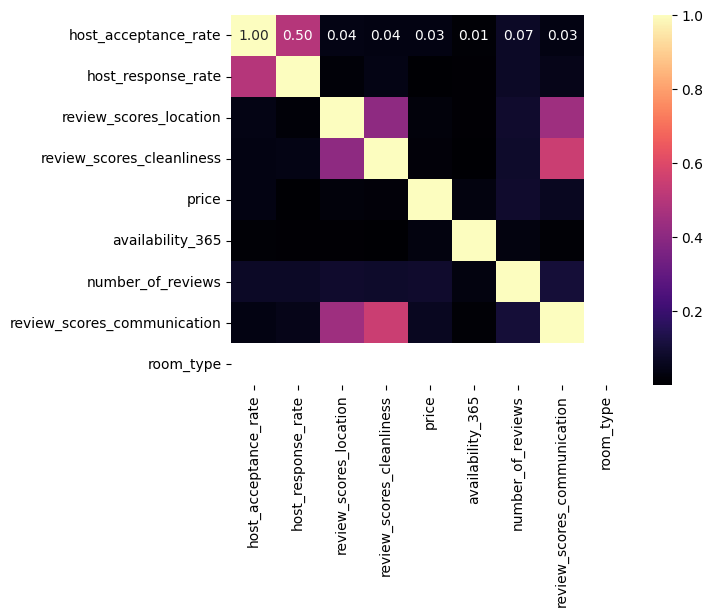

In [131]:
Corr_Factors=Entire_homeapt.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_EHA=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_EHA

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

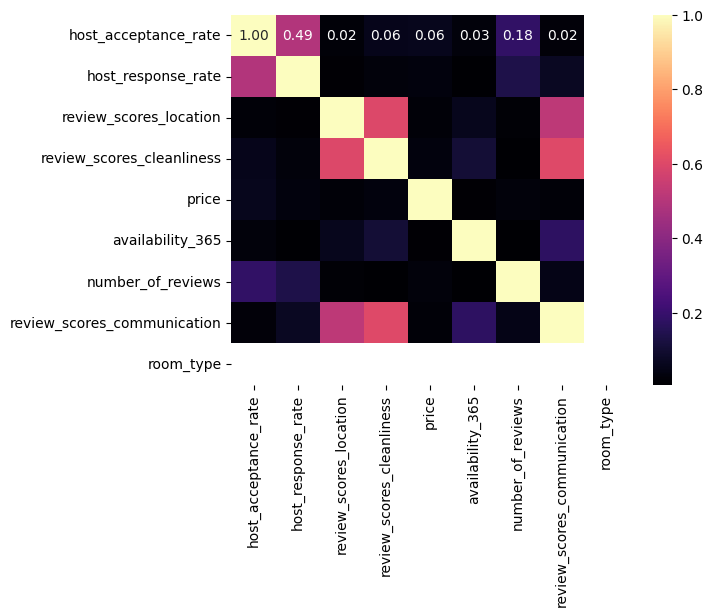

In [76]:
Corr_Factors=Private_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_PR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_PR

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

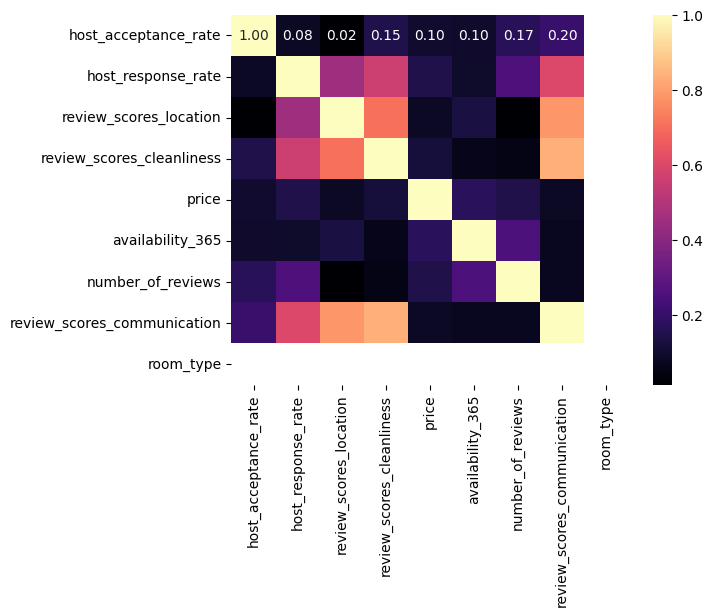

In [77]:
Corr_Factors=Hotel_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_HR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_HR

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

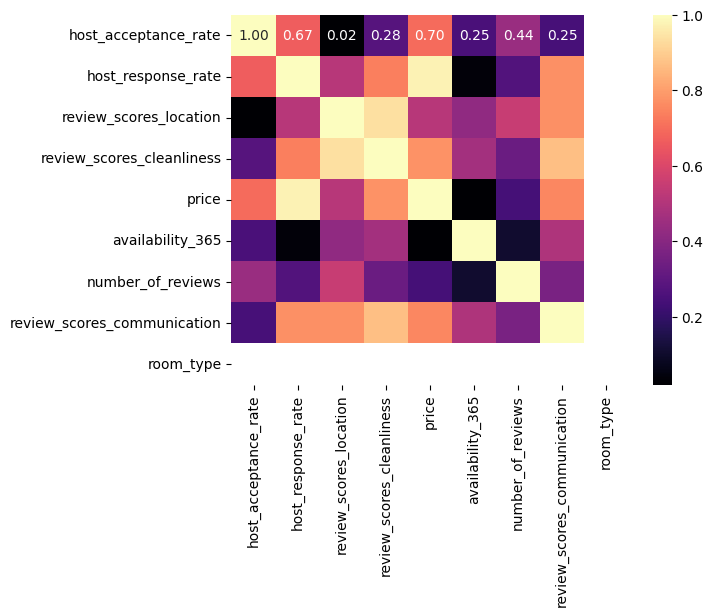

In [78]:
Corr_Factors=Shared_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_SR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_SR

# Correlación y Determinación

In [138]:
Vars_Indep=correlacion_prueba[["host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness","price","availability_365","number_of_reviews","review_scores_communication"]]
Var_Dep= correlacion_prueba['room_type']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

In [ ]:
#Coeficiente de Determinación
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter.head(10))

In [ ]:
#Coeficiente de Correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl.head(10)

# Modelo Regresión Lineal Múltiple

In [ ]:
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)
sns.scatterplot(x='no_previous', y='total', color="yellow", data=df)